# Case study: Exploratory Data Analysis (IMDb Top Movies)

In this case study, we will perform exploratory data analysis (EDA) on a dataset derived from IMDb's top-rated movies. EDA is a critical step in data science that allows us to understand the information underlying our data, to make informed decisions about the modeling process, and to prepare the data for modeling.

For clarification, the Internet Movie Database (IMDb) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew, and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

In [1]:
# Library for the statistic data vizualisation
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Loading
Let's start by downloading it from https://shorturl.at/cqwBC locally to your computer.

Then, upload it to colab.

And using Python's pandas library to load the csv file.

In [2]:
# download dataset from https://shorturl.at/cqwBC
from google.colab import files

uploaded = files.upload()

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [3]:
import io

movies = pd.read_csv(io.BytesIO(uploaded['IMDB-Movie-Data.csv']))

## Data Understanding

We can use the following commands to get information about the dataset, like the number of observations, the number of features, the type of features, etc.

In [4]:
movies.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


The IMDb (Internet Movie Database) Top Movies dataset is a commonly used dataset for data analysis and machine learning. It contains information about a large number of movies, including details such as the title, director, actors, year of release, runtime, rating, and more.

Here's a brief explanation of the common columns you might find in this dataset:

*   **Rank**: The rank of the movie in the list. Movies are typically ranked based on their ratings, with the highest-rated movies having the lowest rank (i.e., Rank 1 would be the highest-rated movie).
*   **Title**: The title of the movie.
*   **Genre**: The genre or genres of the movie, such as Comedy, Drama, Action, etc.
*   **Description**: A brief description or synopsis of the movie.
*   **Director**: The director of the movie.
*   **Actors**: The main actors in the movie.
*   **Year**: The year the movie was released.
*   **Runtime (Minutes)**: The length of the movie in minutes.
*   **Rating**: The rating of the movie, typically on a scale from 0 to 10. This represents the average score given by viewers.
*   **Votes**: The number of votes the movie received. This can be an indicator of the movie's popularity.
*   **Revenue (Millions)**: The revenue the movie generated, usually in millions of dollars.
*   **Metascore**: The Metascore of the movie from Metacritic. This score is derived from reviews by professional critics and is another measure of a movie's quality, separate from the viewer ratings.

This dataset can be used for various types of data analysis and machine learning tasks. For example, you might want to predict a movie's revenue based on its other attributes, or you might want to analyze trends in movie genres or ratings over time.

## Exploratory Analysis
Descriptive Statistics

In [6]:
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Data Cleaning

From the above table it is clearly visible that Revenue has some of the movies which gained very high Revenue their is huge gap beetween 50% -75% - max value.

Also, from the above data colum it is understood, Revenue and Metascore column has missing values which needs to be treated. But Revenue of the movie is very sensitive and which we can not relace by Mean, Median or Mode filling.

We can go ahead and drop those rows from our EDA process.

In [7]:
df=movies[~movies['Revenue (Millions)'].isnull()].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


Metascore still has few null records left whcih can be replaced using mean value treatment.

In [8]:
max_metascore =df['Metascore'].mean()
df.Metascore.fillna(max_metascore,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           872 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


Let us first look at the Revenue of all the movies over period of time.

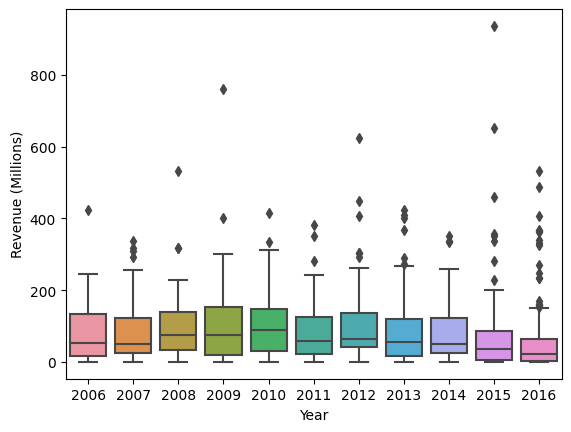

In [9]:
sns.boxplot(data=df,x='Year', y='Revenue (Millions)')
plt.show()

We can observe from above plot, Year 2015 and 2009 clearly has datapoint with highest Revenue generating movie.

Which we will observe in our further analysis.

I will be adding a column with 1 in all the rows which will be usefull in our further analysis. Also, for now we will keep our original Table Sorted by Revenue.

## Relationship Between Features

In [ ]:
df['cnt']=1

The line df['cnt'] = 1 is used to add a new column called 'cnt' to the dataframe df. All the entries in this new column will be filled with the value 1.

This is often done to facilitate counting or aggregating in subsequent steps. For example, this can be used to count the number of occurrences of each unique value in another column.

The sns.pairplot function from the seaborn library in Python is a way to visualize the relationships between different variables in the dataset. It produces a matrix of scatterplots, where each plot represents a pair of variables. The diagonal of this matrix shows the distribution of each variable.

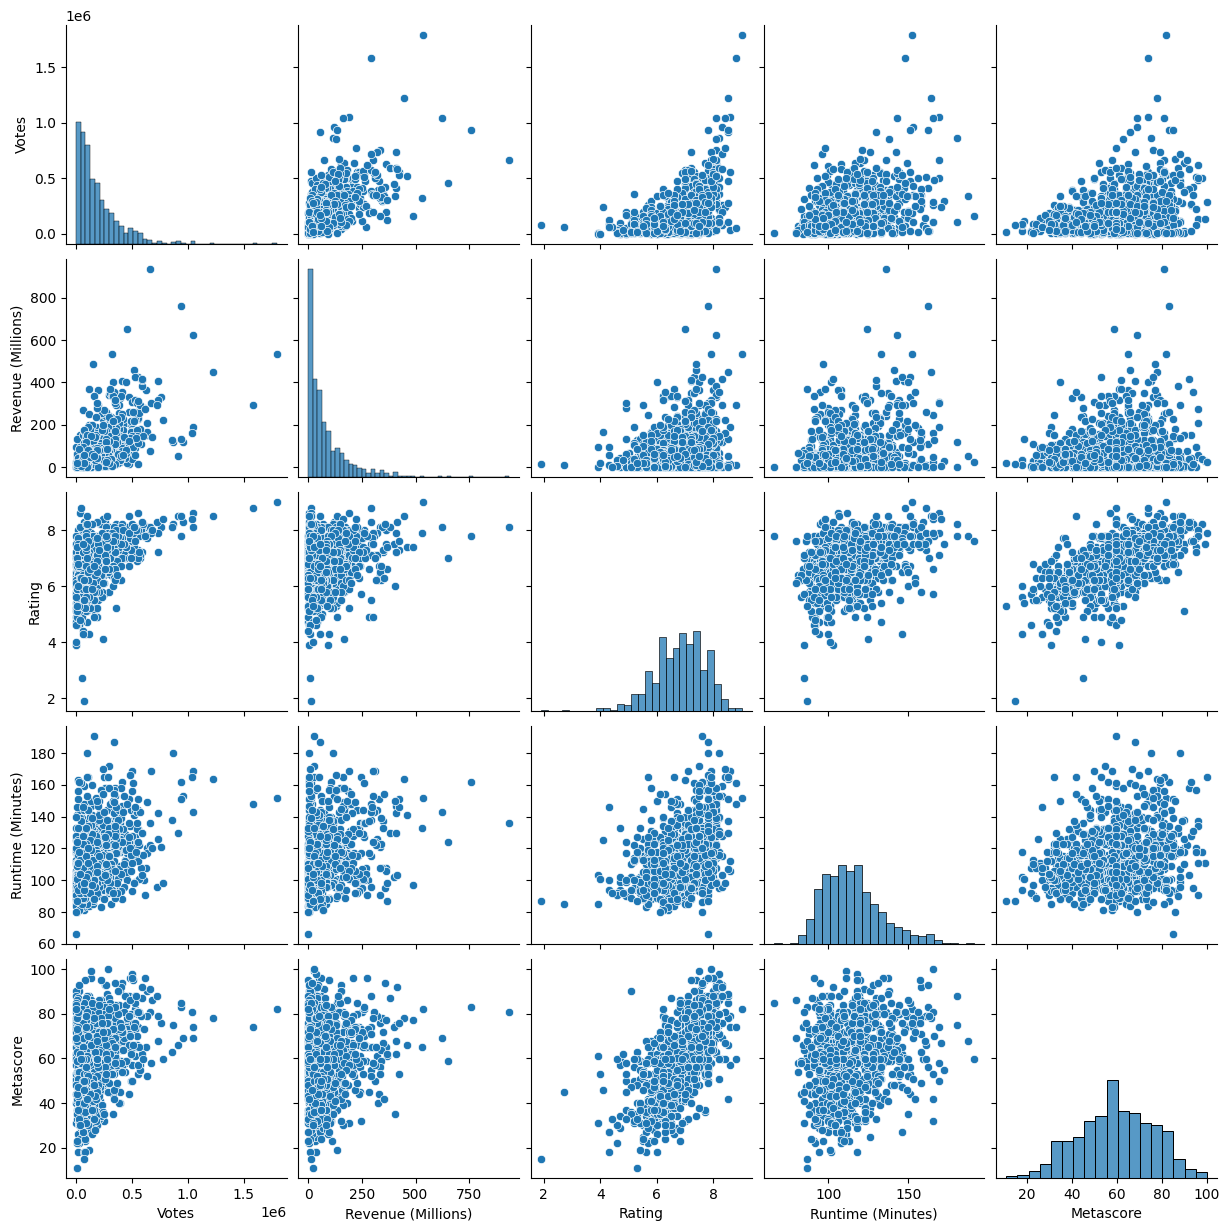

In [ ]:
sns.pairplot(data=df, vars=["Votes", "Revenue (Millions)","Rating", "Runtime (Minutes)","Metascore"])
plt.show()

The above Pairplot gives us the basic understanding on distribution of all the numerical column.

If we look at the Relationship of Revenue and Votes- YOY ( year over year)

In [ ]:
import plotly
import plotly.express as px

px.scatter(df,x='Revenue (Millions)',y='Votes',size='Votes',
           color = 'Rating',hover_name='Title',animation_frame='Year',
           title="Distribution of Revenue and Votes")

From the above plot we observe that their are movies which has Higher Rating along with Higher Votes still Revenue is not up to the Mark. Year - 2012 (Django Unchained) Year - 2014 (Interstellar) Year - 2006 (The Prestige,The Departed)

Let us extract more insights from the Table.... First split the Genre and Actor Table for more understandig !

In [ ]:
df[['Genre1', 'Genre2','Genre3']] = df['Genre'].str.split(',', 3, expand=True).fillna(value="")
df[['Actor1', 'Actor2','Actor3']] = df['Actors'].str.split(',', 2,expand=True).fillna(value="")

In [ ]:
df['Genre2']=df['Genre2'].fillna(df.Genre1, inplace=True)
df['Genre3']=df['Genre3'].fillna(df.Genre1,inplace=True)

In [ ]:
df_by_genre1 = df.groupby('Genre1')
df_by_genre2 = df.groupby('Genre2')
df_by_genre3 = df.groupby('Genre3')
agg_genre1=df_by_genre1.sum()
agg_genre2=df_by_genre2.sum()
agg_genre3=df_by_genre3.sum()
ge1_ge2 = agg_genre1.add(agg_genre2, fill_value=0.0)
final_genre = ge1_ge2.add(agg_genre3, fill_value=0.0)
genre_temp=final_genre.reset_index().head(10)
genre_temp

,Genre1,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,cnt
0,Action,116887.0,555447.0,32613.0,1832.2,68054324.0,33697.82,14823.601432,276.0
1,Adventure,33383.0,142862.0,8536.0,495.0,16911278.0,8055.20,4401.725537,71.0
2,Animation,22728.0,94592.0,4591.0,343.7,10192662.0,8987.50,3295.150358,47.0
3,Biography,30041.0,120799.0,7398.0,442.9,9743517.0,3357.27,4122.875895,60.0
4,Comedy,89117.0,313969.0,16831.0,1022.3,19948763.0,8046.83,8808.875895,156.0
5,Crime,28089.0,108634.0,6471.0,379.8,10459846.0,2216.35,3393.575179,54.0
6,Drama,79019.0,313932.0,18325.0,1100.6,24137985.0,5596.42,10207.601432,156.0
7,Fantasy,1367.0,4020.0,195.0,13.3,354186.0,126.22,121.000000,2.0
8,Horror,20045.0,70448.0,3521.0,213.5,3448962.0,1398.14,1904.575179,35.0
9,Mystery,6422.0,22129.0,1212.0,76.0,2823557.0,708.17,648.000000,11.0


After grouping and adding all the Genre we observe that Action  has the maximum Revenue and followed by Adventure andAnimation.

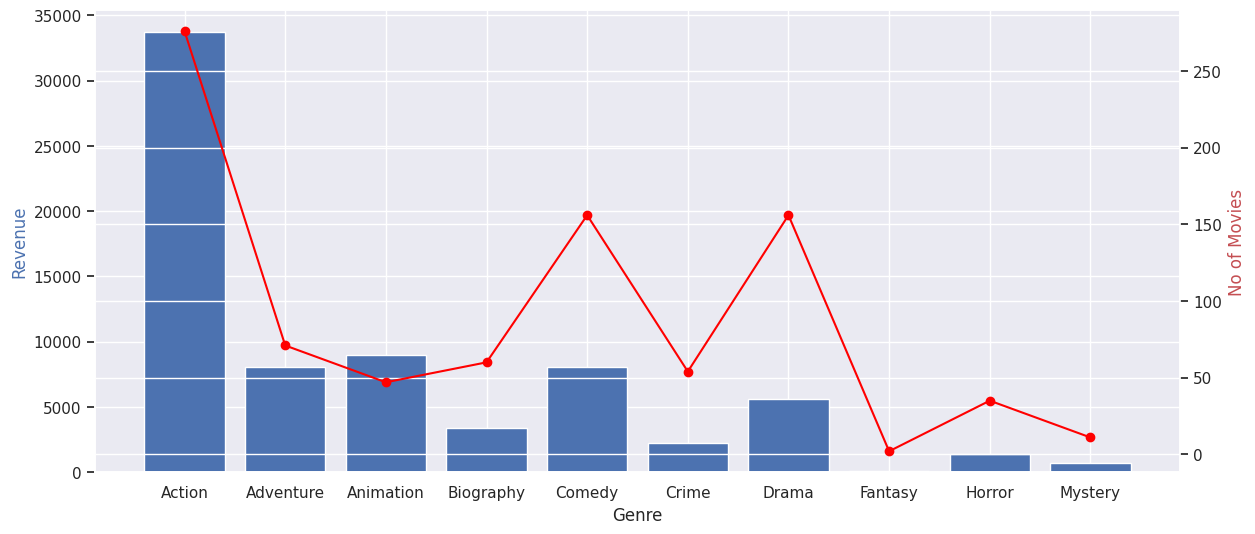

In [ ]:
sns.set(style="darkgrid")

fig, ax1 = plt.subplots(figsize = (14,6))

ax2 = ax1.twinx()
ax1.bar(genre_temp['Genre1'],genre_temp['Revenue (Millions)'])
ax2.plot(genre_temp['Genre1'],genre_temp['cnt'], 'o-', color="red" )
ax1.set_xlabel('Genre')
ax1.set_ylabel('Revenue', color='b')
ax2.set_ylabel('No of Movies', color='r')
plt.show()

Genre - Action has maximum numbers of movies and which generates maximum Revenue compared to other Genre. But if we look at Drama and Comedy has on an average 150 nos of movies but generates very less revenue in comparision with other category of Genre and respective Revenues.

Now we will look at the number of (movies) released in year..... YOY no of releases increaing linearly and year 2016 seems to have spike in no of relases. But Same growth is not observed for Revenue !

In [ ]:
df_year = df.groupby('Year')['cnt'].count().reset_index()
px.line(df_year, x='Year',y='cnt',template='plotly_dark',text='cnt',
        title="No of releases in Year")

In [ ]:
df_Rev = df.groupby('Year')['Revenue (Millions)'].sum().round(1).reset_index()
px.line(df_Rev, x='Year',y='Revenue (Millions)',template='plotly_dark',text='Revenue (Millions)',
        title="Revenue in Years")

We will now drill down within year 2016 - released movies.Top Revenue generating movies in year 2016 and their Ratings

Captain America and Rouge One is most Revenue generating movies of Year 2016 being below 8 Rating. and on the other hand Deadpool and Zootopia having Rating above 8 still the revenue Ranks at 4th and 5th.

One point to observe here Zootopia belongs to Genre - Animation and that can be one of reason of lagging behine in Revenue but still high in Rating.

In [ ]:
df_2016 = df[df['Year']==2016].copy()
df_temp=df_2016.sort_values(by='Revenue (Millions)',ascending = False).head(10)
px.bar(df_temp,y='Revenue (Millions)',x='Title',color='Genre1',text='Rating',
       title='Most successful Movies/Genre of Year:2016')

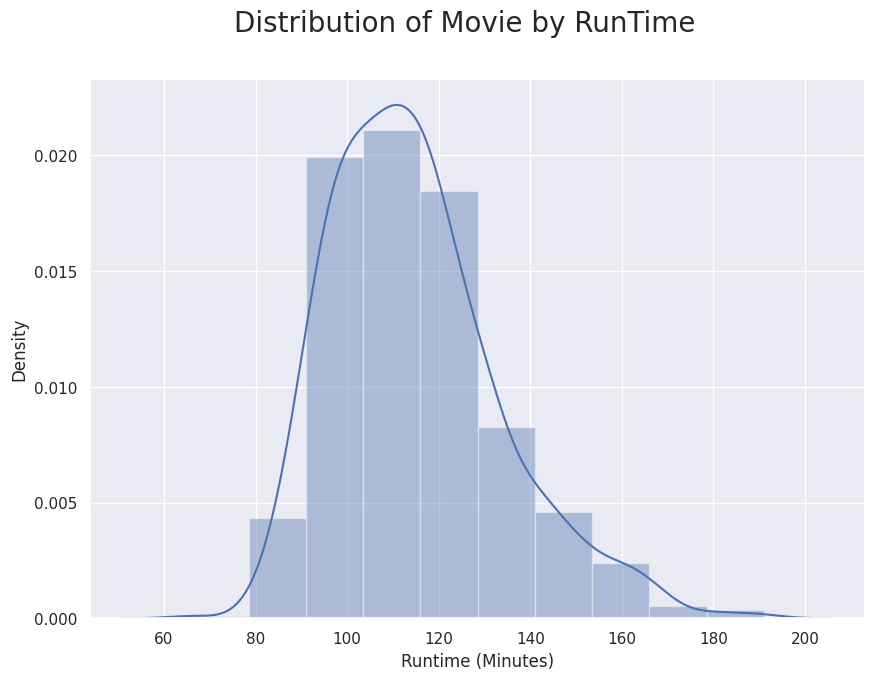

In [ ]:
plt.figure(figsize=(10,7),facecolor='white')
sns.distplot(df['Runtime (Minutes)'],bins=10,kde=True)
plt.suptitle("Distribution of Movie by RunTime", fontsize=20)
plt.show()

Most of Movies Belongs to Runtime Range - 90 to 130 Minutes

In [ ]:
movies_Rev=df.sort_values(by='Revenue (Millions)',ascending = False)[0:10]
px.pie(movies_Rev, values='Revenue (Millions)', names='Actor1',title='Actors vs Revenue Distribution')

In [ ]:
px.pie(movies_Rev, values='Revenue (Millions)', names='Title', title='Movies vs Revenue Distribution')

If We consider the Primary actor of the Movies and and Revenue Generated by respective movie is Robert Downey Jr.

But that is not the case, chances are on the above plot we distribution of Revenue is additing of one or more movies done by respective Actor.

We will further analyse on this part

In [ ]:
px.bar(movies_Rev,x='Actor1',y='Revenue (Millions)',color='Votes',
       hover_name='Title', text='Rating',template='plotly_dark')

Now from above Plot, it is clear that why Revenue generated by the Movies of Robert Downey Jr. is Highest amon the all because it has more then one movie.

Also, a intresting point to observe from above plot -> Movie - The Dark Knight got the Highest Rating of 9 and Highest Votes above 1.6M still below average Revenue generated by Movie copare to other Movie and actor!

Let us now look at the list of Top Directors and their critic score !

In [ ]:
top_director= df.groupby('Director')['Revenue (Millions)'].sum().reset_index()
top_director.sort_values('Revenue (Millions)',ascending =False)[0:5]

,Director,Revenue (Millions)
204,J.J. Abrams,1683.45
129,David Yates,1630.51
90,Christopher Nolan,1515.09
349,Michael Bay,1421.32
159,Francis Lawrence,1299.81


In [ ]:
px.bar(movies_Rev,x='Director',y='Revenue (Millions)',
       color='Metascore',hover_name='Title',
       template='plotly_dark',text='Revenue (Millions)', title='Top Directors and Revenue Distribution by Metascore')

In [ ]:
movies_Votes=df.sort_values(by='Votes',ascending = False)[0:20]

px.bar(movies_Votes,x='Actor1',y='Votes',color='Revenue (Millions)',
       hover_name='Title',text='Rating',template='plotly_dark',
      title='Most Popular/Voted Actors')

In [ ]:
px.bar(movies_Votes,x='Title',y='Votes',color='Revenue (Millions)',
       hover_name='Title',text='Metascore',template='plotly_dark',
      title='Most Popular/Voted Movies')

We can extract list of Top Actors by Revenue generated in Movies. And Let us look at the distribution of Revenue and Rating for Top Actors.

In [ ]:
top_Actor = pd.pivot_table(df,index=['Actor1'],
                           values=['Revenue (Millions)','Metascore','Votes','Rating','cnt'],
                           aggfunc={'Revenue (Millions)':np.sum,'Metascore':np.mean,
                                    'Votes':np.mean,'Rating':np.mean,'cnt':np.sum})

In [ ]:
actor = top_Actor.sort_values(by='Revenue (Millions)',
                              ascending = False).reset_index()[0:20]
actor

,Actor1,Metascore,Rating,Revenue (Millions),Votes,cnt
0,Robert Downey Jr.,60.750000,7.512500,2564.58,556738.500000,8
1,Jennifer Lawrence,61.666667,6.950000,1607.87,347564.666667,6
2,Christian Bale,69.181818,7.318182,1559.62,492911.909091,11
3,Will Smith,50.063909,6.977778,1340.28,275772.666667,9
4,Johnny Depp,56.946897,6.800000,1280.94,307826.625000,8
5,Daniel Radcliffe,63.142857,7.157143,1279.28,262638.571429,7
6,Shia LaBeouf,48.115036,6.580000,1254.36,310977.400000,5
7,Chris Pratt,72.666667,7.633333,1243.07,492917.000000,3
8,Kristen Stewart,57.500000,5.483333,1221.95,198119.166667,6
9,Leonardo DiCaprio,68.666667,7.922222,1117.86,654595.333333,9


In [ ]:
px.scatter(actor,y= 'Revenue (Millions)',x= 'Rating',
           color= 'cnt',size='Rating',text='Actor1',
           title='Revenue Vs Rating of most Popular Actor and No of Movies')

In [ ]:
px.histogram(df, x='Metascore',y='Revenue (Millions)',title='Impact of Metascore on Revenue')

We can observe from the above plot - Metascore from 55 to 70 seems to have highest Revenue